In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
# Step-1 Generate Data

X, Y = make_regression(n_samples=500, n_features=10, n_informative=5, noise=25.8, random_state=0)
print(X.shape, Y.shape)
n_features = X.shape[1]

(500, 10) (500,)


In [16]:
pd.DataFrame(X).head(n=100) #show first 100 rows

,0,1,2,3,4,5,6,7,8,9
0,1.706468,1.511639,-0.000417,0.374155,0.073285,0.701783,0.409552,-0.461894,-0.626490,-0.799593
1,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
2,0.093953,-0.130107,0.929505,0.582225,-2.739677,0.943046,-2.094603,-0.569312,0.269904,0.123722
3,-1.542758,-0.789954,0.537035,-0.286835,-2.369623,-0.767332,1.634406,-0.260560,0.128957,0.571227
4,-0.101003,-2.231538,0.436187,1.571463,1.324868,-0.587375,1.077315,0.840648,0.261106,0.811090
...,...,...,...,...,...,...,...,...,...,...
95,1.396849,2.123526,-0.104049,0.881225,0.374969,-0.432827,-0.088373,0.494445,0.761391,0.267671
96,-0.954943,0.100564,1.102283,-0.697073,1.010428,-1.470402,0.207334,0.496179,0.576956,0.759157
97,0.715939,0.542611,0.147434,-0.977465,0.880938,-2.994613,0.879390,1.808132,0.436638,0.635425
98,-0.177813,-1.892362,1.905064,-0.014777,1.054758,0.250998,-0.300479,0.960048,-0.416499,-0.355029


In [17]:
# step=2 Normalise
def normalise(X):
    u = X.mean(axis=0).shape
    std = X.std(axis=0)
    
    return (X-u) / std

In [18]:
X = normalise(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,-8.429209,-8.470612,-10.070459,-10.093983,-9.745413,-10.127899,-9.660195,-10.253784,-10.958297,-10.959969
1,-11.807002,-9.340297,-10.441807,-10.737356,-10.541911,-10.918799,-8.965069,-9.526722,-10.413460,-9.483507
2,-10.068104,-10.108925,-9.134024,-9.875795,-12.506999,-9.865108,-12.182562,-10.359065,-10.033913,-10.022943
3,-11.731590,-10.767393,-9.529243,-10.787120,-12.143704,-11.728104,-8.426434,-10.056455,-10.179261,-9.568792
4,-10.266249,-12.205962,-9.630797,-8.838446,-8.516689,-11.532089,-8.987576,-8.977152,-10.042986,-9.325367


In [19]:
X.mean(axis=0)

array([-10.19403981, -10.05021783, -10.1642671 , -10.43552927,
        -9.84861448, -10.87310395, -10.08193102,  -9.79269327,
       -10.24741234, -10.19820924])

In [20]:
X.std(axis=1)

array([0.82278776, 0.82683333, 1.01246416, 1.10855237, 1.14966323,
       0.80596336, 1.06766487, 0.96082655, 1.3372723 , 1.07566321,
       1.09394733, 1.05324696, 0.80829941, 1.11543899, 1.15444828,
       0.76056262, 0.63967638, 0.9984932 , 0.7697902 , 1.05077387,
       0.67580697, 0.72153605, 1.16581579, 0.97885692, 0.99010597,
       0.90397951, 1.3175242 , 1.19329255, 0.95634703, 0.99233799,
       1.12479253, 0.89088311, 1.56150345, 1.10515095, 1.05224361,
       1.05811586, 0.7653125 , 1.13680356, 1.23580254, 0.60024578,
       1.36554459, 1.09016832, 0.74954294, 1.1684525 , 0.74382933,
       0.87967357, 1.46400697, 0.78093171, 0.69652862, 1.19643836,
       0.89580859, 1.05341931, 1.03853902, 1.47584374, 0.95772289,
       1.0736338 , 1.20972334, 0.79165596, 1.07004114, 1.01411685,
       0.61716941, 0.90152138, 1.06499984, 0.59148144, 0.64104073,
       1.16017693, 1.02364961, 0.70352751, 0.65119519, 0.87761268,
       0.79548069, 0.60152334, 1.06025408, 0.66564209, 1.03530

In [21]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

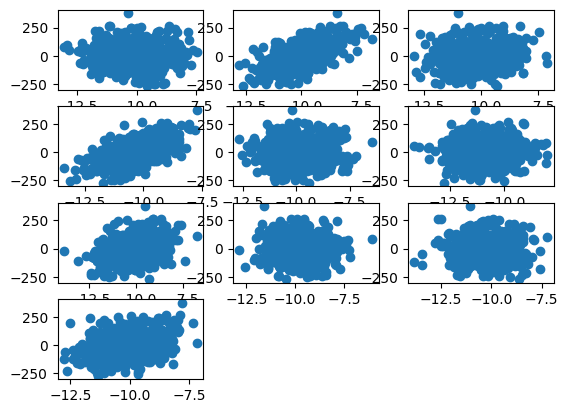

In [22]:
# step - 3
# Visualise y as a function of each feature

for f in range(0, 10):
    plt.subplot(4, 3, f + 1)
    plt.scatter(X[:, f], Y)

plt.show()

In [23]:
# step - 4
XT, Xt, YT, Yt = train_test_split(X, Y, test_size=0.3, shuffle=False, random_state=0)

In [24]:
print(XT.shape, YT.shape)  # Train
print(Xt.shape, Yt.shape)  # Test

(350, 10) (350,)
(150, 10) (150,)


In [32]:
# step - 5 Modelling / Linear Regression with Mltiple Features

def preprocess(x):
    #add a column of 1's in x as 0th column
    if x.shape[1] == n_features:
        m = x.shape[0]
        ones = np.ones((m, 1))
        x = np.hstack((ones, x))
    return x

def hypothesis(X, theta):
    return np.dot(X, theta)   # Dot product of two array

def loss(x, y, theta):
    YP = hypothesis(x, theta)
    error = np.mean((y - YP) ** 2)
    return error

def gradient(x, y, theta):
    YP = hypothesis(x, theta)
    grad = np.dot(x.T, (YP - y))
    m = x.shape[0]
    return grad/m

def train(x, y, learning_rate=0.1, max_iters=100):
    n = x.shape[1]
    theta = np.random.randn(n)
    error_list = []

    for i in range(max_iters):
        e = loss(x, y, theta)
        error_list.append(e)
        grad = gradient(x, y, theta)
        theta = theta - learning_rate * grad

    plt.plot(error_list)
    return theta

In [27]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,-8.429209,-8.470612,-10.070459,-10.093983,-9.745413,-10.127899,-9.660195,-10.253784,-10.958297,-10.959969
1,-11.807002,-9.340297,-10.441807,-10.737356,-10.541911,-10.918799,-8.965069,-9.526722,-10.413460,-9.483507
2,-10.068104,-10.108925,-9.134024,-9.875795,-12.506999,-9.865108,-12.182562,-10.359065,-10.033913,-10.022943
3,-11.731590,-10.767393,-9.529243,-10.787120,-12.143704,-11.728104,-8.426434,-10.056455,-10.179261,-9.568792
4,-10.266249,-12.205962,-9.630797,-8.838446,-8.516689,-11.532089,-8.987576,-8.977152,-10.042986,-9.325367


In [29]:
XT = preprocess(XT)  # Train
Xt = preprocess(Xt); # Test
print(XT.shape, Xt.shape)

(350, 11) (150, 11)


C:\Users\soura\AppData\Local\Temp\ipykernel_13868\2664499087.py:16: RuntimeWarning: overflow encountered in square
  error = np.mean((y - YP) ** 2)


[ 2.70529840e+199 -2.74982236e+200 -2.72834405e+200 -2.73529183e+200
 -2.82738521e+200 -2.66527695e+200 -2.92570621e+200 -2.72365486e+200
 -2.64571021e+200 -2.76599493e+200 -2.77214709e+200]


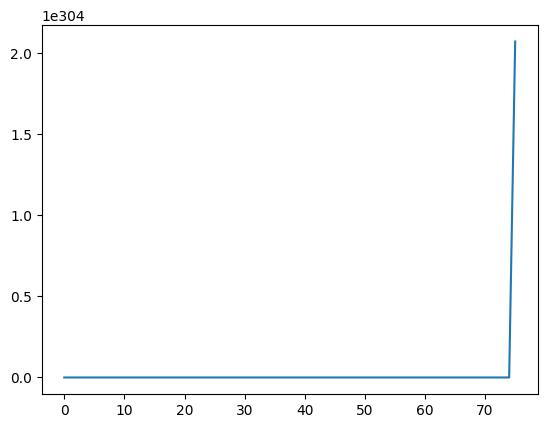

In [33]:
theta = train(XT, YT)
print(theta)